# métodos numéricos con SciPy

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

### 1. interpolación
usamos el paquete `scipy.interpolate`, el cual ofrece métodos de interpolación de datos utilizando diferentes métodos. 
Ejemplo:

In [19]:
#método de interpolación uni-dimensional:
from scipy.interpolate import interp1d

#los datos a interpolar:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.2, 0.8, 1.2, -1.0, -1.5])

#interpolación lineal:
f = interp1d(x, y)

#interpolación cúbica:
f2 = interp1d(x,y, kind="cubic")

In [20]:
f?

Signature:      f(x)
Type:           interp1d
String form:    <scipy.interpolate.interpolate.interp1d object at 0x119e119f0>
File:           ~/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and '

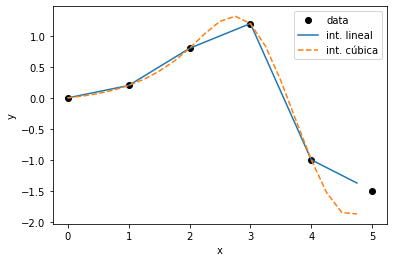

In [21]:
#valores de x donde evaluaremos interpolación
#xnew = np.linspace(0, 5, num=41, endpoint=True)

xnew = np.arange(0, 5, 0.25)

#graficamos los datos e interpolaciones:
fig, ax = plt.subplots()

ax.plot(x,y, "ok", label="data")
ax.plot(xnew, f(xnew), "-", label="int. lineal")
ax.plot(xnew, f2(xnew), "--", label="int. cúbica")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc="best")

### 2. aproximación
estos métodos permiten aproximar un conjunto de datos mediante una curva que recupere la tendencia globar de los mismos, pero **no** necesariamente los exprese con exactitud. El ejemplo más usual es la _regresión lineal_

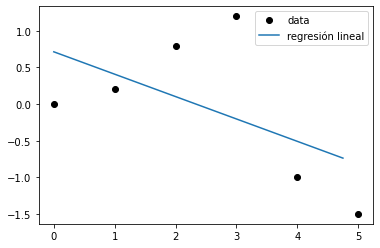

In [24]:
# la regresión lineal ajusta una recta a los datos
from scipy.stats import linregress
m, n, r_value, p_value, std_err = linregress(x, y)
 
#graficando:
fig, ax = plt.subplots()
ax.plot(x, y, "ok", label="data")
ax.plot(xnew, m*xnew + n, "-", label="regresión lineal")
ax.legend(loc="best")

### 3. ajuste de curvas

técnica utilizada en la búsqueda de modelos que puedan representar un conjunto de datos de la forma + fiel posible.
Se considera que los datos pueden contener ruido o errores que los separen del modelo teórico probado, de modo que el ajuste de curvas también se considera un _método de aproximación_

In [25]:
from scipy.optimize import curve_fit

In [26]:
#definimos la función que seguirán los datos
# también utilizamos esta def en el ajuste

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

#generación de datos con ruido a partir de la función
xdata= np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

La función que siguen los datos es:
$f(x) = 2.5 \exp(-1.3 x) + 0.5$.

Ahora se ajustan los parámetros de esta curva utilizando el método `curve_fit`:

In [27]:
popt, pcov = curve_fit(func, xdata, ydata)

print ("parámetros optimizados: ", popt)
print("matriz de covarianza: ")
print(pcov)

parámetros optimizados:  [2.61032714 1.36803191 0.47937536]
matriz de covarianza: 
[[ 0.00936156  0.0040057  -0.00043336]
 [ 0.0040057   0.01152889  0.003078  ]
 [-0.00043336  0.003078    0.00161807]]


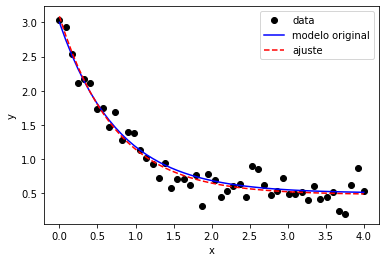

In [28]:
#finally, graficar los datos + curva original + ajustada

fig, ax = plt.subplots()

ax.plot(xdata, ydata, "ok", label="data")
ax.plot(xdata, func(xdata, 2.5, 1.3, 0.5), "-b", label="modelo original")
ax.plot(xdata, func(xdata, *popt), "--r", label="ajuste")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc="best")